In [1]:
# Importing my tools and reading in my data

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

VisaAmount = 0.035
NewAmount = 0.02
MaxTransAmount = 5001
MinTransAmount = 30001
diverging_colors = sns.color_palette("RdBu", 10)

data = 'C:\\Users\\cdfwo\\Downloads\\res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv'

df = pd.read_csv(data)

df = df.drop('Agency Number', axis=1)
df = df.drop('Year-Month', axis=1)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# I'm creating a new column for the amount made off of each transaction by Visa
df['Visa Fee']=round(df.Amount * VisaAmount,2)

In [3]:
# I'm creating a column with the fee being 1% lower
df['Renegotiated Fee']=round(df.Amount * NewAmount)

In [4]:
# Verifying I have enough data if I keep only the transactions greater than 5000
df_underfive = df[(df['Amount'] < MaxTransAmount)]

In [5]:
df_over30k = df[(df['Amount'] > MinTransAmount)]

In [6]:
# I want the amount each agency spent summed
agency_df = df.groupby(['Agency Name','Merchant Category Code (MCC)'], as_index=False).sum()

In [7]:
# Grouping by MCC, getting the top 15 sum and mean of Amount and by putting them descending order

top_15_what = (df.groupby('Merchant Category Code (MCC)')['Amount']
               .agg(['mean','sum'])
               .reset_index()
               .sort_values('sum',ascending=False)
               .head(15))

In [8]:
# Grouping by Agency Name, getting the top 15 sum and mean of Amount and putting them descending order

top_15_agencies = (df.groupby('Agency Name')['Amount']
                   .agg(['mean','sum'])
                   .sort_values('sum',ascending=False)
                   .reset_index()
                   .head(15))

In [9]:
# Grouping by Agency Name, getting the bottom 15 sum and mean of Amount and by putting them ascescending order

bottom_15_agencies = (df.groupby('Agency Name')['Amount']
                      .agg(['sum'])
                      .reset_index()
                      .sort_values('sum',ascending=True)
                      .head(15))

In [10]:
# I'm grouping the df_over30k dataframe by Agency Name getting the bottom 15 sum and mean of Amount 
# and by putting them ascescending order. The df_over30k dataframe will set the minimum value in Amount to 30,001

bottom_15_agencies_over_30k = (df_over30k.groupby('Agency Name')['Amount']
                      .agg(['sum'])
                      .reset_index()
                      .sort_values('sum',ascending=True)
                      .head(15))

In [11]:
# Getting info on my agency_df dataframe

agency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8427 entries, 0 to 8426
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Agency Name                   8427 non-null   object 
 1   Merchant Category Code (MCC)  8427 non-null   object 
 2   Amount                        8427 non-null   float64
 3   Visa Fee                      8427 non-null   float64
 4   Renegotiated Fee              8427 non-null   float64
dtypes: float64(3), object(2)
memory usage: 395.0+ KB


In [12]:
# I've decided to keep negative numbers in the dataset for the timebeing. If I feel they're hendering the analysis
# my plan is to 0 them out. Since I'm not sure if the original transactions were kept, I don't feel
# that it would irresponisble of me to assume the negative numbers replaced their original transactions.

In [13]:
# Finding the number of unique values in the values in the Agency Name column

len(agency_df['Agency Name'].unique())

124

In [14]:
# Finding the number of unique values in the values in the Merchant Category Code (MCC) column

len(agency_df['Merchant Category Code (MCC)'].unique())

435

In [15]:
format_dict = {'sum':'${0:,.0f}','mean':'${0:,.0f}','pct_of_total':'{:.2%}'}

In [16]:
(top_15_what.style
 .format(format_dict)
 .background_gradient(subset=['mean'], cmap='Purples'))

,Merchant Category Code (MCC),mean,sum
124,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP AND SUP.,$545,"$11,004,961"
219,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,$501,"$10,846,920"
105,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE","$1,834","$10,091,601"
96,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED","$1,168","$8,139,121"
268,MISCELLANEOUS AND SPECIALTY RETAIL STORES,$417,"$5,563,077"
23,AMERICAN AIRLINES,$441,"$5,296,951"
62,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,$514,"$5,218,792"
367,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",$205,"$5,094,192"
128,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,$677,"$4,731,575"
297,OTHER FEES,"$3,307","$4,076,935"


In [17]:
(top_15_agencies.style
 .format(format_dict)
 .background_gradient(subset=['mean'], cmap='Purples'))

,Agency Name,mean,sum
0,OKLAHOMA STATE UNIVERSITY,$291,"$33,778,840"
1,UNIVERSITY OF OKLAHOMA,$327,"$24,886,383"
2,UNIV. OF OKLA. HEALTH SCIENCES CENTER,$421,"$24,527,325"
3,GRAND RIVER DAM AUTH.,"$2,130","$22,213,829"
4,DEPARTMENT OF TRANSPORTATION,$918,"$14,399,262"
5,DEPARTMENT OF CORRECTIONS,$627,"$13,988,872"
6,DEPARTMENT OF TOURISM AND RECREATION,$347,"$5,971,885"
7,DEPARTMENT OF VETERANS AFFAIRS,$550,"$4,242,097"
8,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,$548,"$3,874,001"
9,OKLAHOMA MILITARY DEPARTMENT,$651,"$3,697,283"


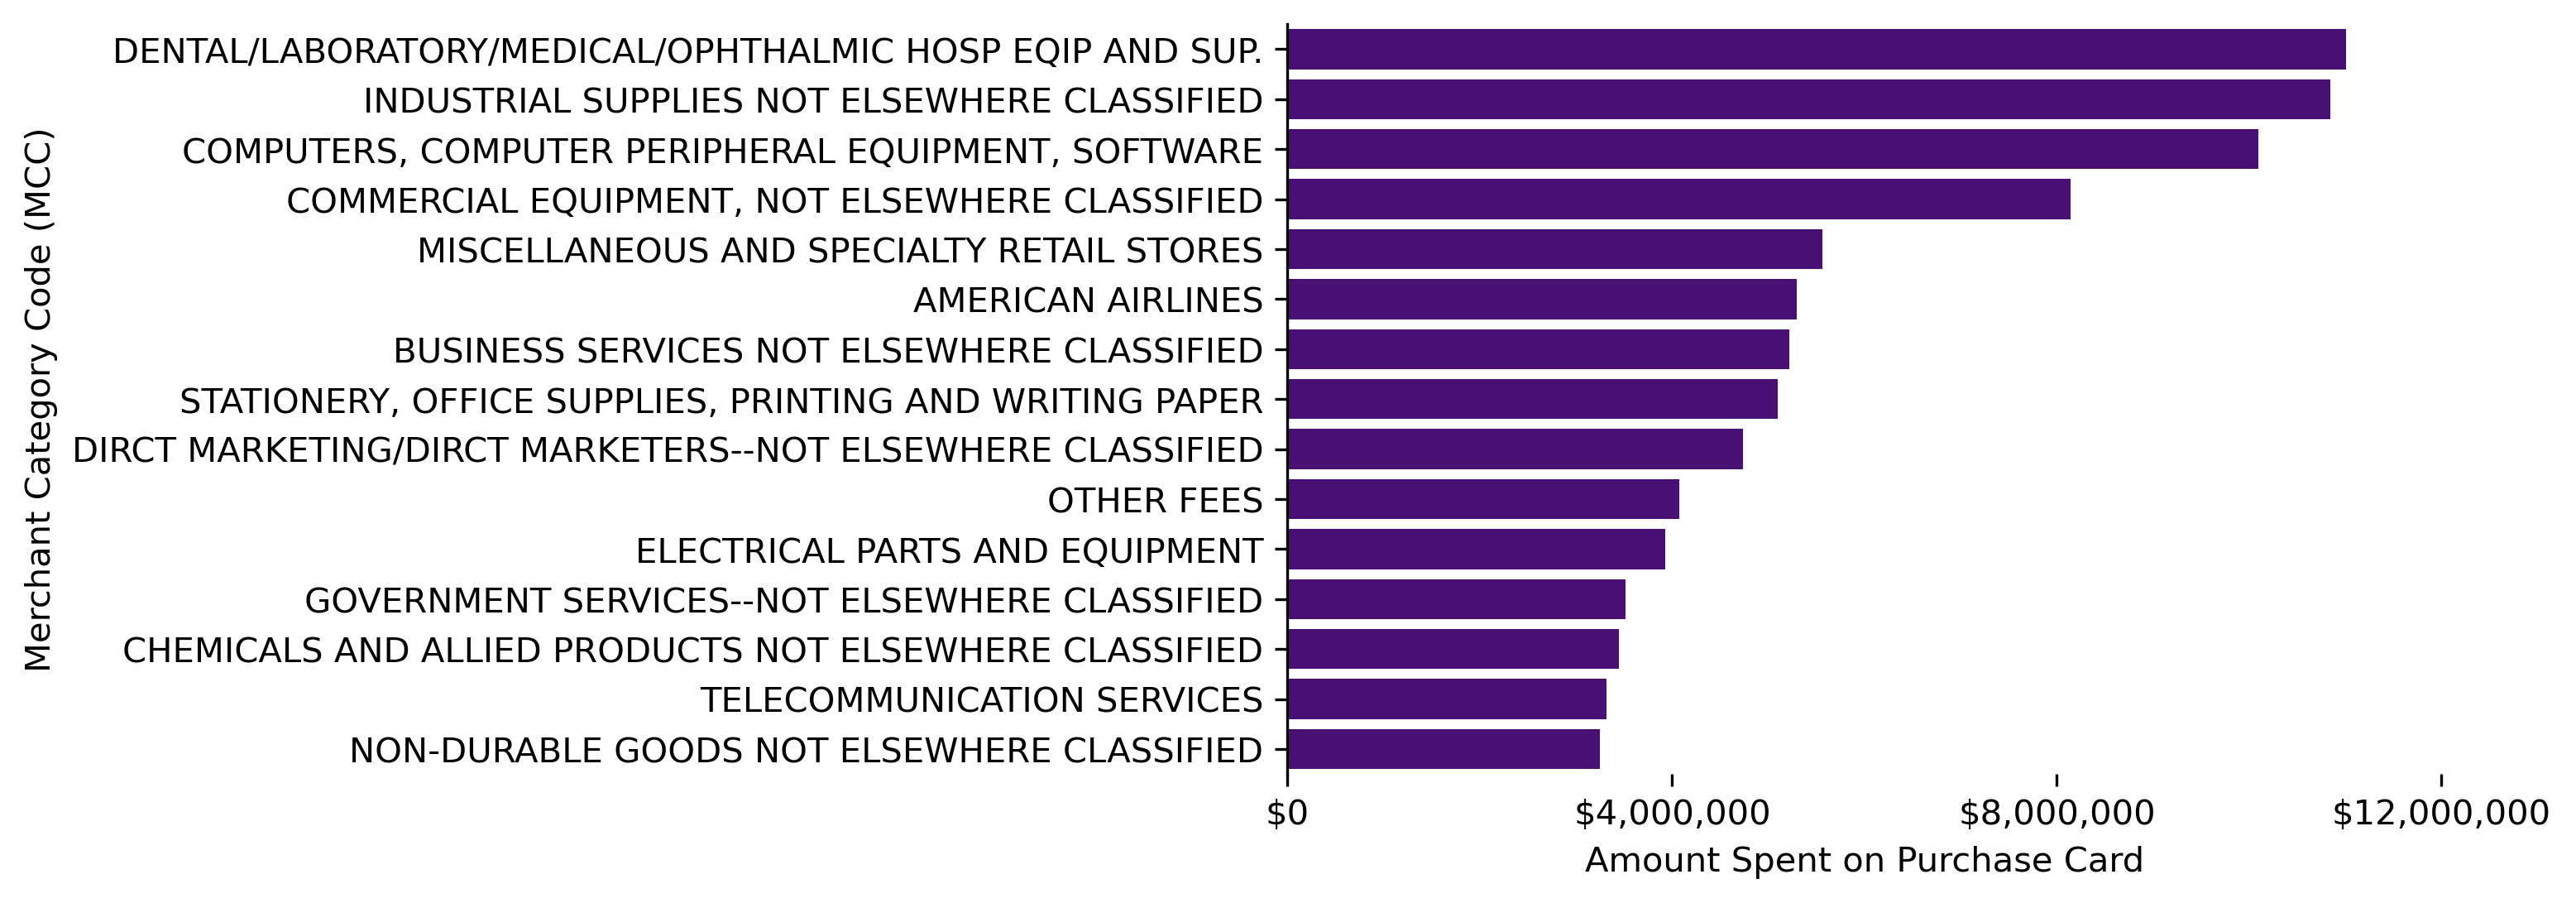

In [18]:
fig, ax = plt.subplots(1,1)
barplot = sns.barplot(data=top_15_what, x="sum", y="Merchant Category Code (MCC)",ci=None,color="indigo")
barplot.xaxis.set_major_formatter('${x:,.0f}')
plt.xlabel('Amount Spent on Purchase Card')
sns.despine(left=False, bottom=True)
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

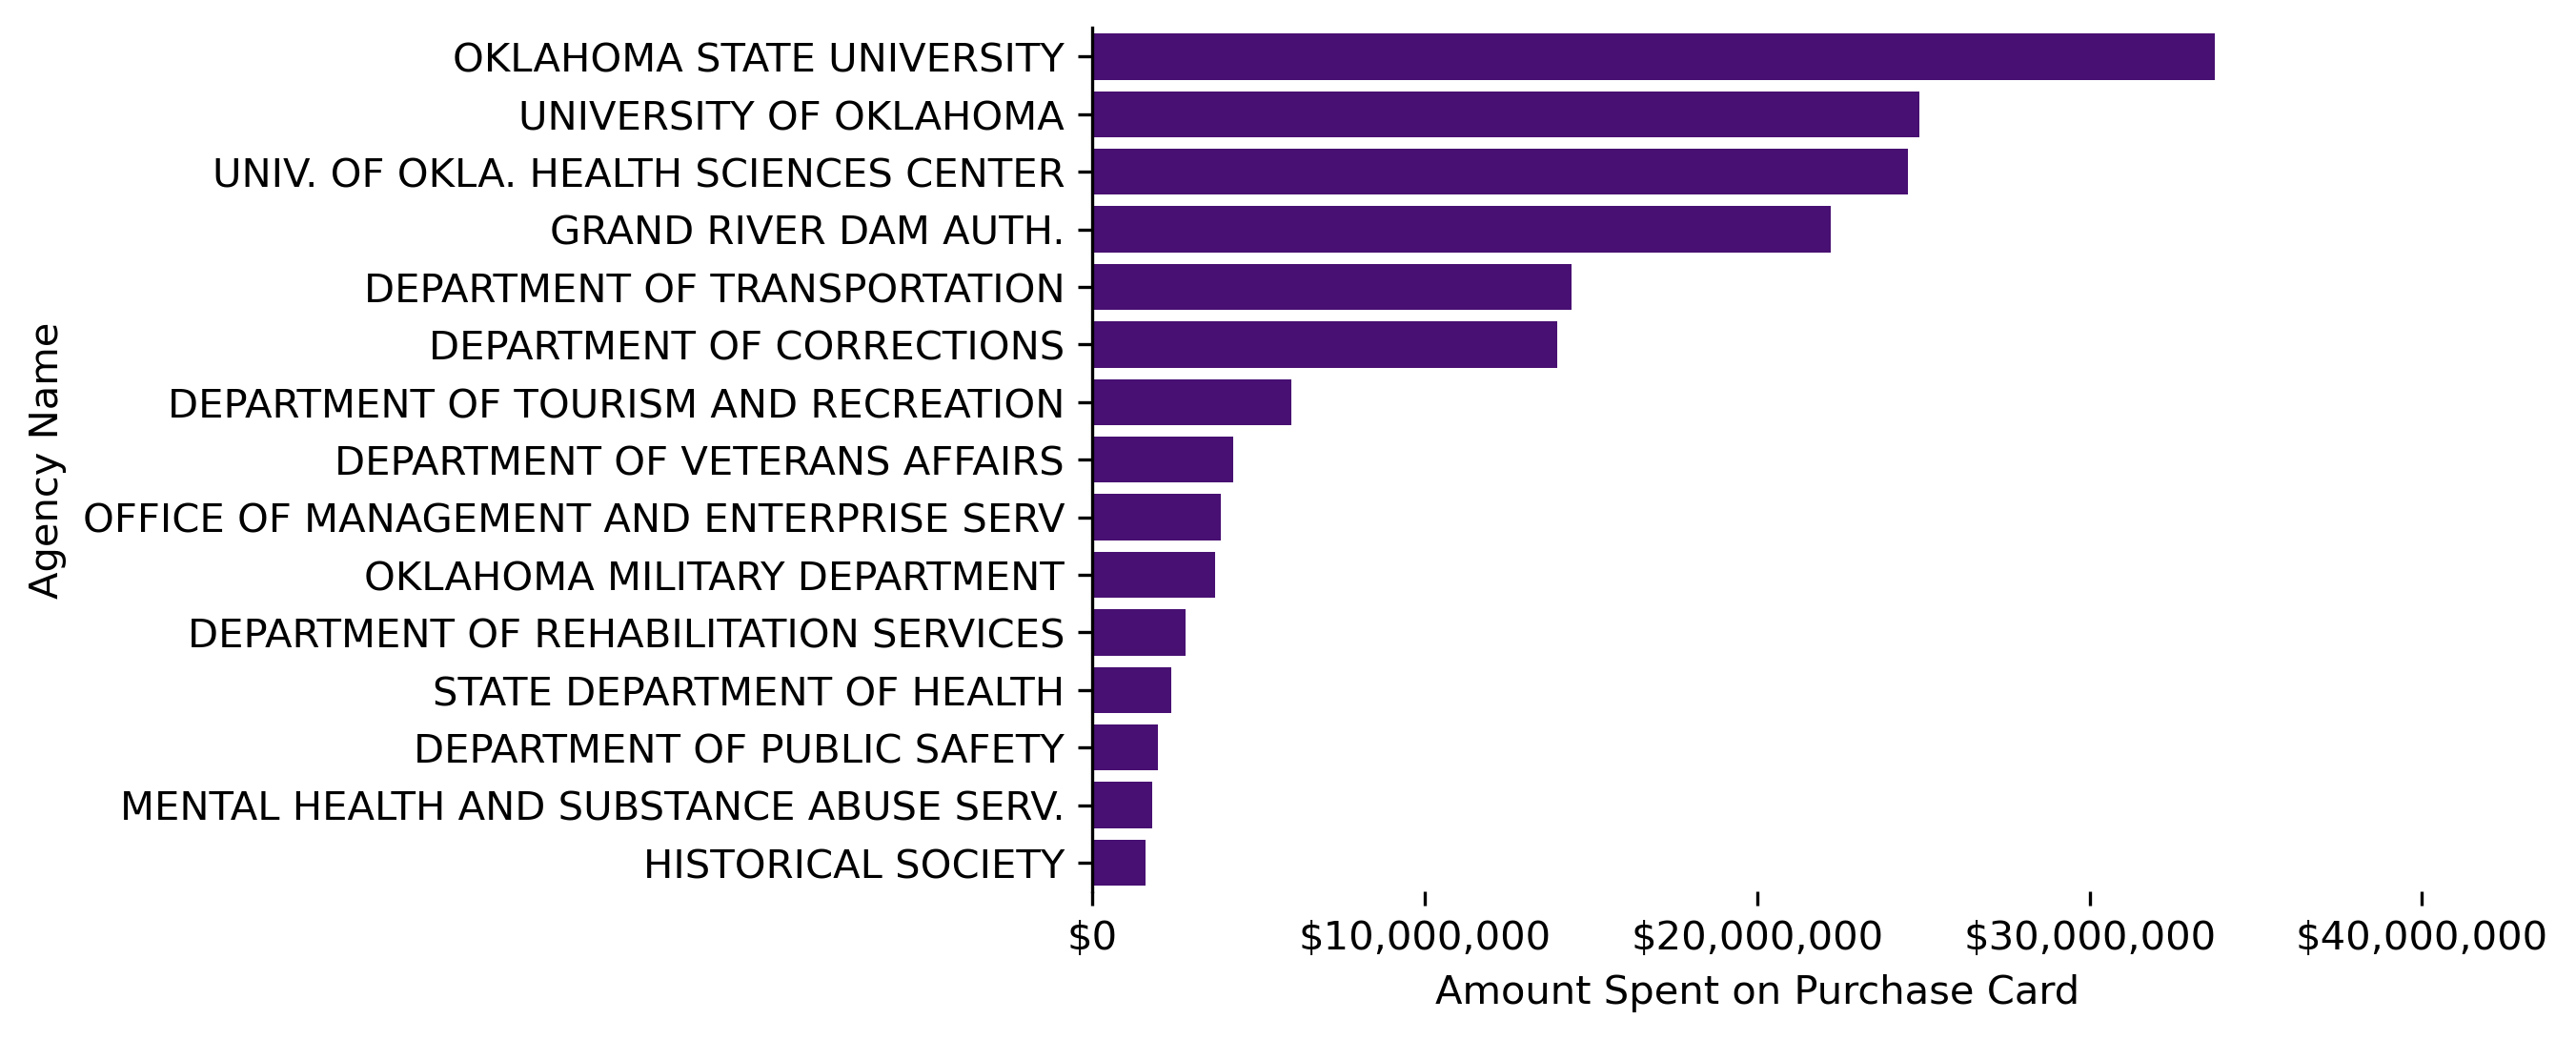

In [19]:
fig, ax = plt.subplots(1,1)
barplot = sns.barplot(data=top_15_agencies, x="sum", y="Agency Name",ci=None,color="indigo")
barplot.xaxis.set_major_formatter('${x:,.0f}')
plt.xlabel('Amount Spent on Purchase Card')
sns.despine(left=False, bottom=True)
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

In [20]:
(bottom_15_agencies.style
 .format(format_dict)
 .background_gradient(cmap='Blues'))

,Agency Name,sum
58,OFFICE OF EDUC. QUALITY & ACCOUNTABILITY,$36
121,WORKER'S COMP. COMMISSION,$60
52,MARGINALLY PROD. OIL & GAS WELLS,$112
7,BD. OF PRIV. VOCATIONAL SCHOOLS,$437
55,MULTIPLE INJURY TRUST FUND,$534
11,CAPITOL IMPROVEMENT AUTHORITY,$594
4,BD. OF EXAM. FOR LT CARE ADMIN.,"$1,190"
122,WORKERS COMPENSATION COURT,"$1,486"
76,OKLAHOMA ABSTRACTORS BOARD,"$1,821"
3,BD. OF EXAM. FOR LT CARE ADMIN,"$2,373"


In [21]:
(bottom_15_agencies_over_30k.style
 .format(format_dict)
 .background_gradient(cmap='Greens'))

,Agency Name,sum
9,J.D. MCCARTY CENTER,"$38,153"
12,OKLA. CAREER AND TECHNOLOGY EDUCATION,"$38,507"
2,DEPARTMENT OF REHABILITATION SERVICES,"$38,761"
17,SUPREME COURT,"$39,762"
16,STATE ELECTION BOARD,"$58,875"
11,OKLA. BUREAU OF NARCOTICS AND DANGEROUS,"$85,628"
8,HISTORICAL SOCIETY,"$90,108"
0,"DEPARTMENT OF AGRICULTURE, FOOD, ANF FOR","$119,618"
18,TULSA COMMUNITY COLLEGE,"$132,802"
10,OFFICE OF MANAGEMENT AND ENTERPRISE SERV,"$229,099"


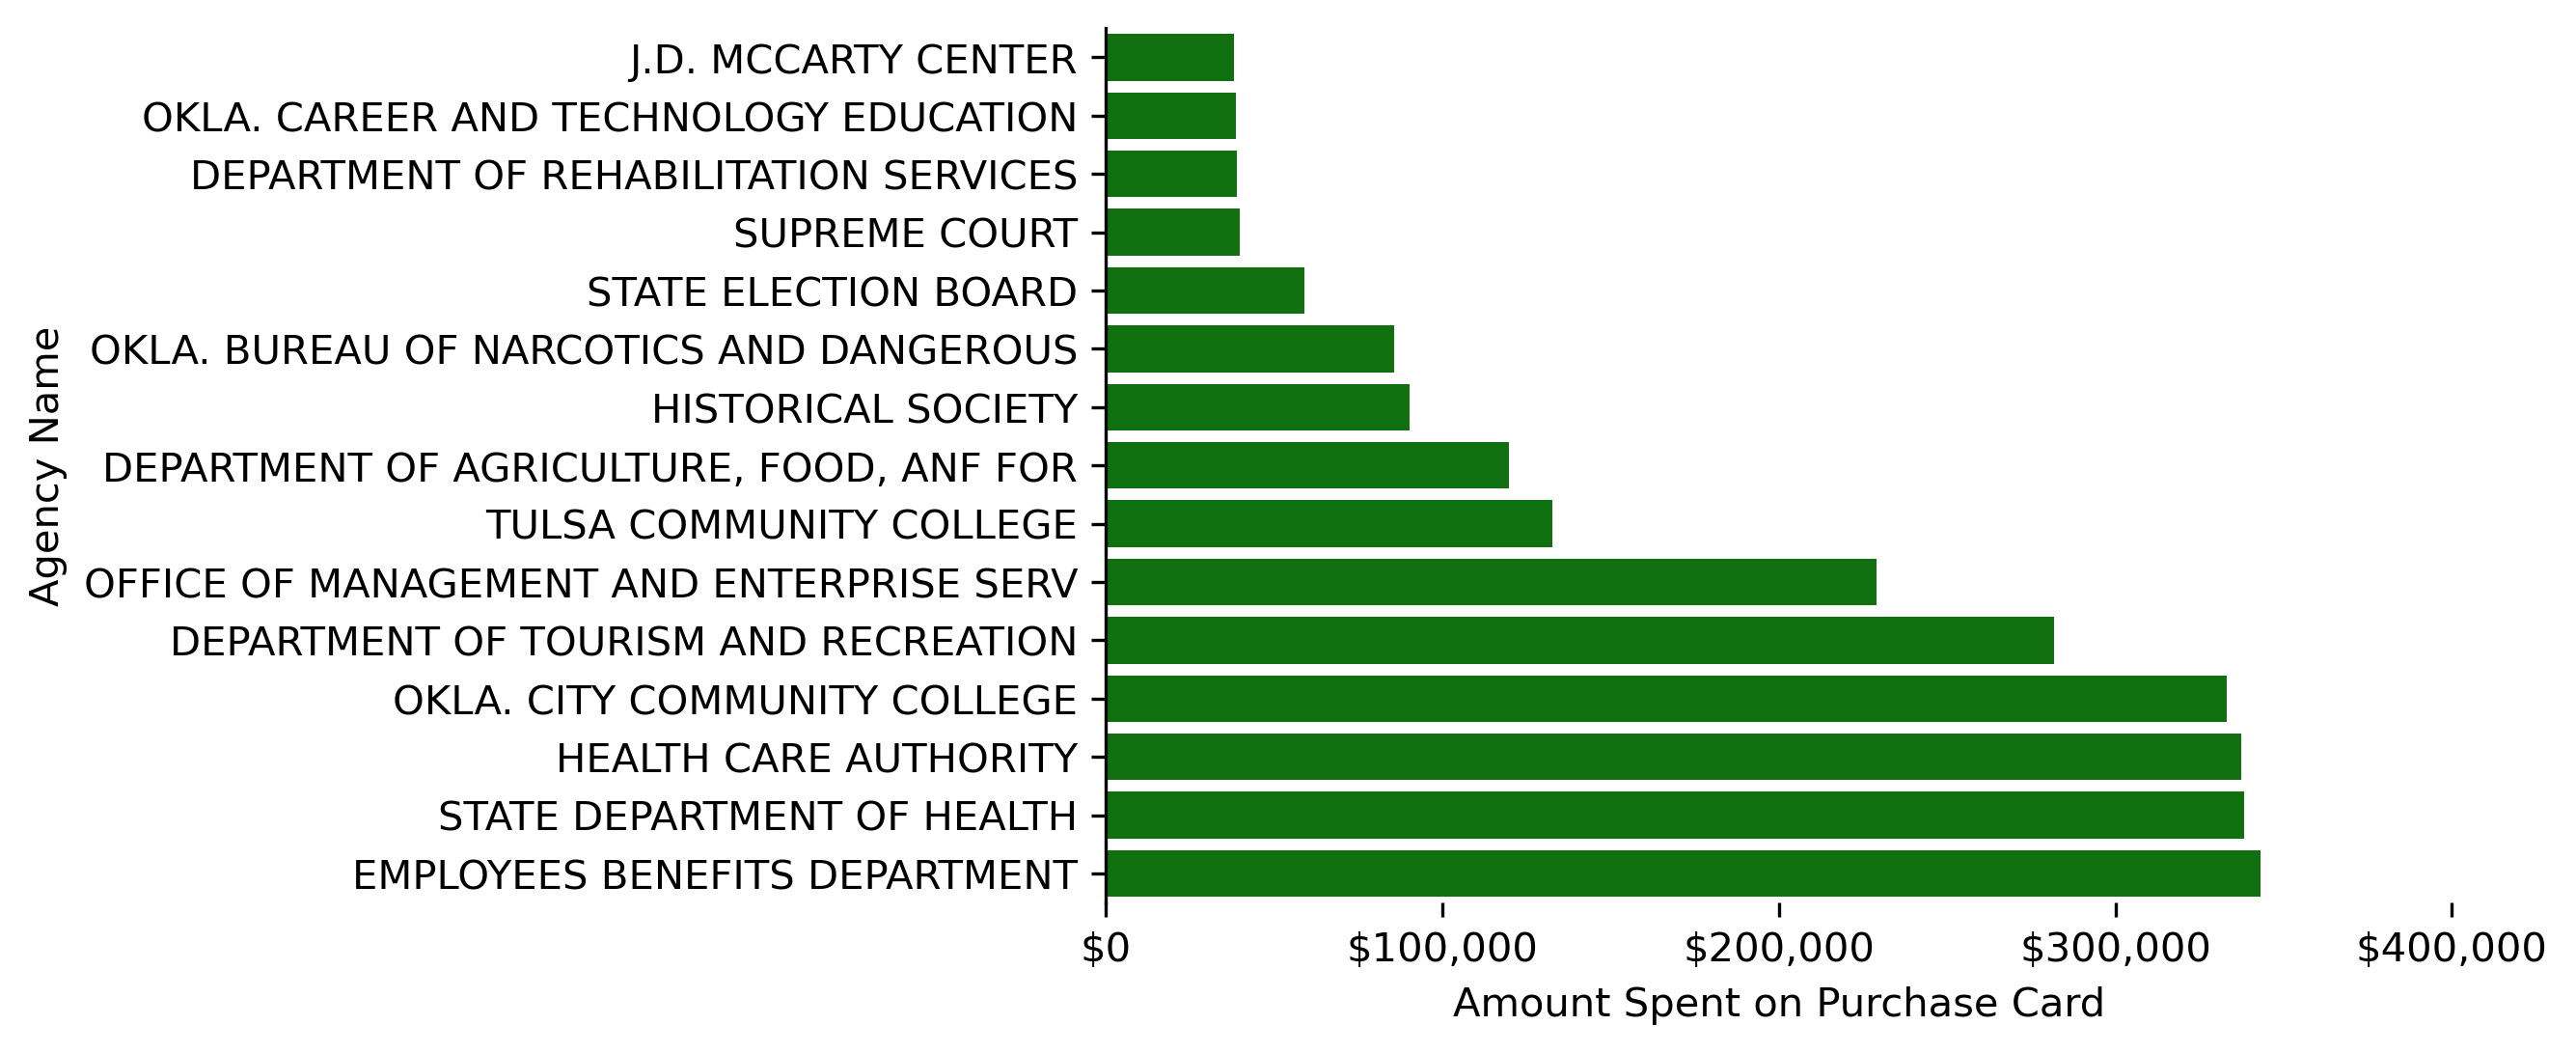

In [22]:
fig, ax = plt.subplots(1,1)
barplot = sns.barplot(data=bottom_15_agencies_over_30k, x="sum", y="Agency Name",ci=None,color="g")
barplot.xaxis.set_major_formatter('${x:,.0f}')
plt.xlabel('Amount Spent on Purchase Card')
sns.despine(left=False, bottom=True)
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

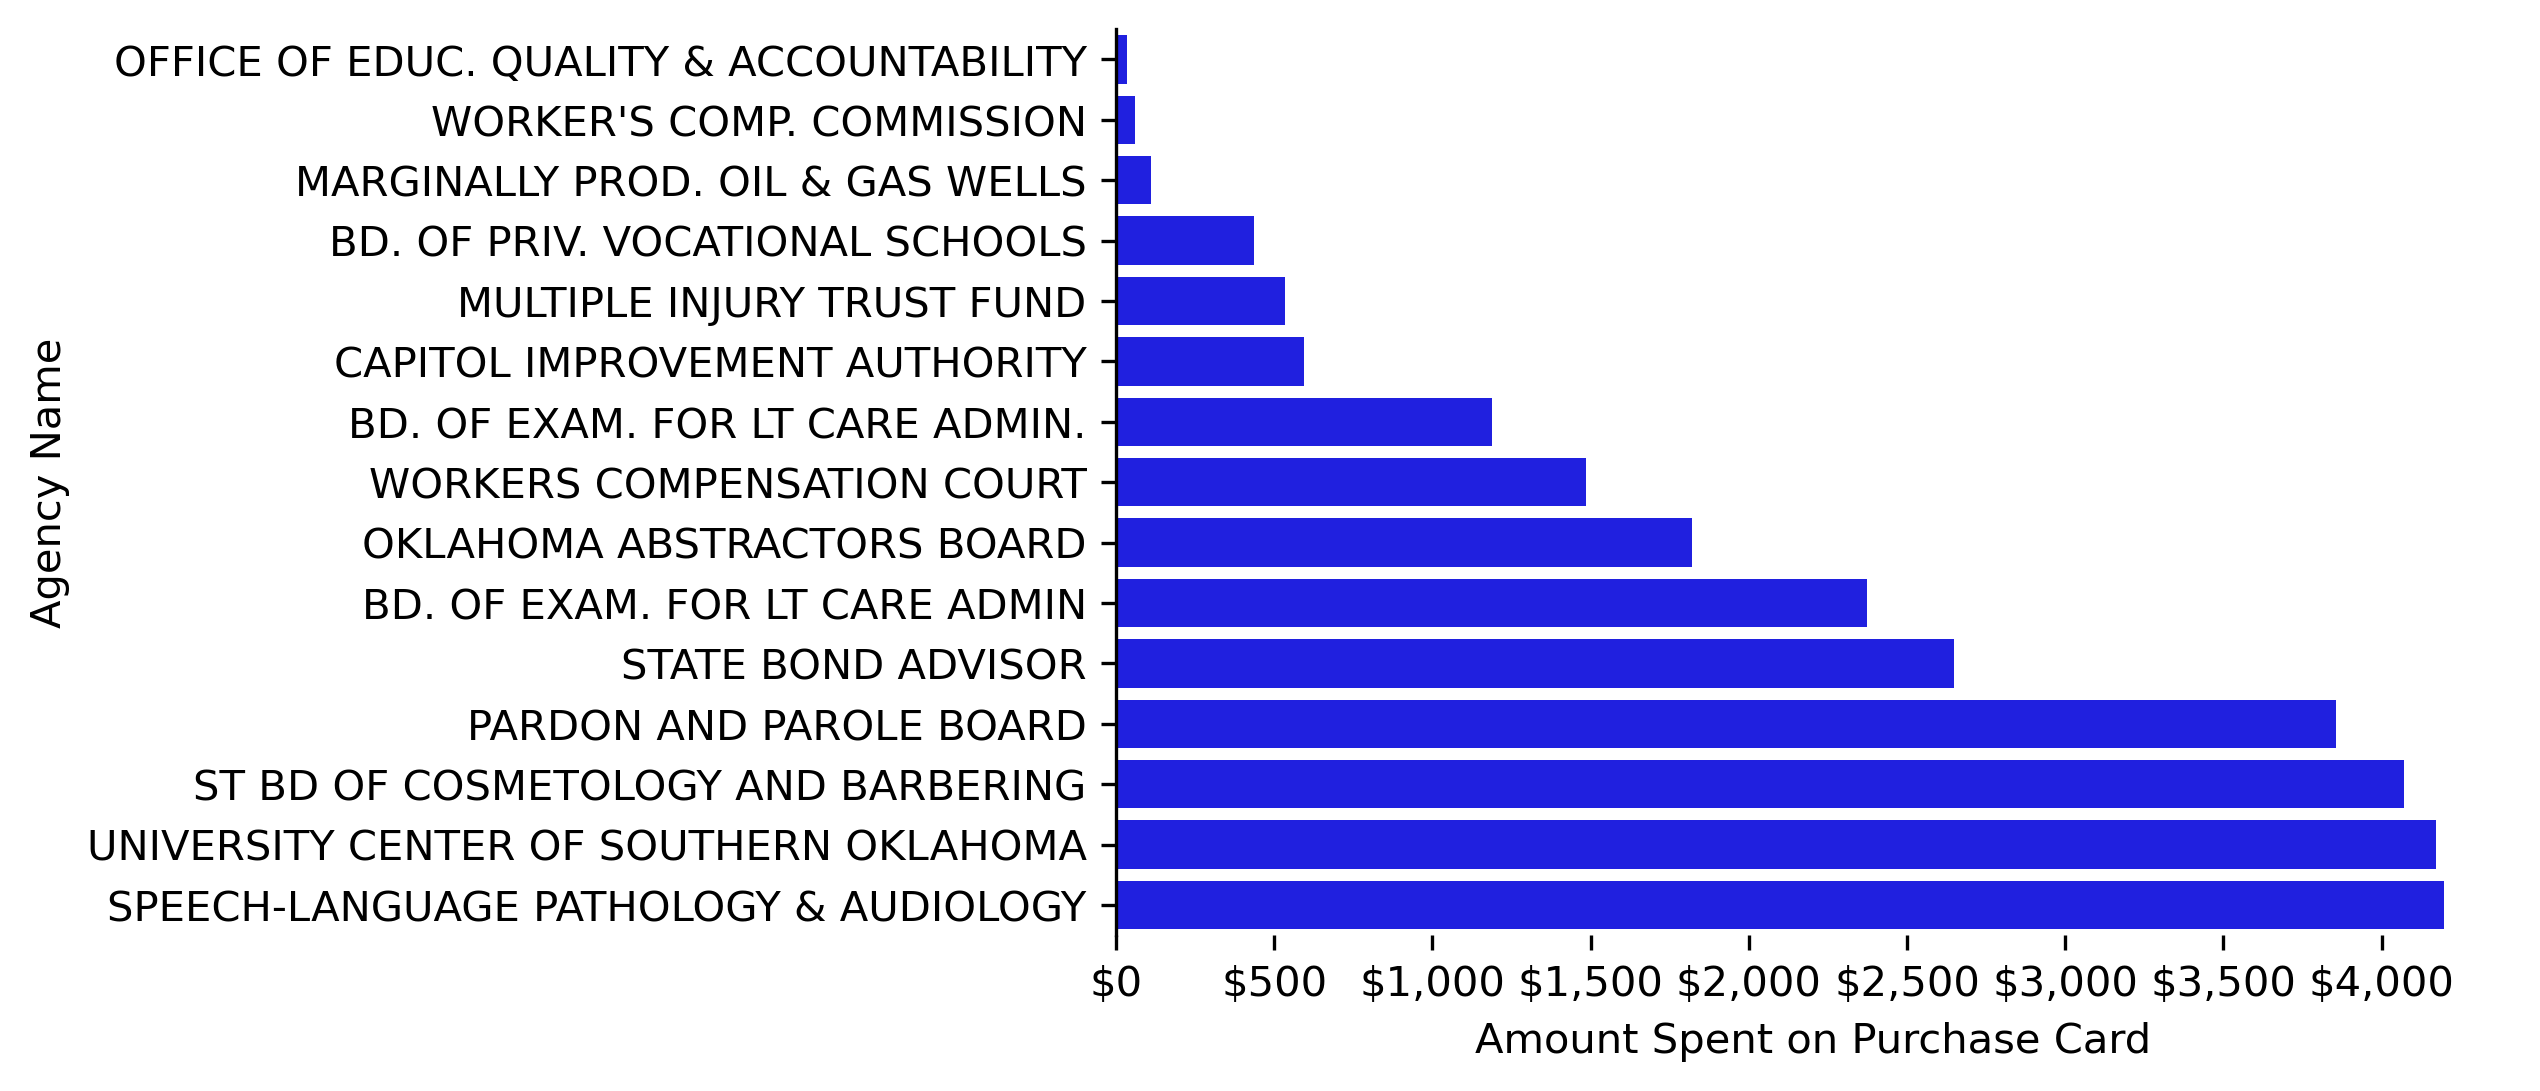

In [23]:
barplot = sns.barplot(data=bottom_15_agencies, x="sum", y="Agency Name",color="b")
barplot.xaxis.set_major_formatter('${x:,.0f}')
plt.xlabel('Amount Spent on Purchase Card')
sns.despine(left=False, bottom=True)
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

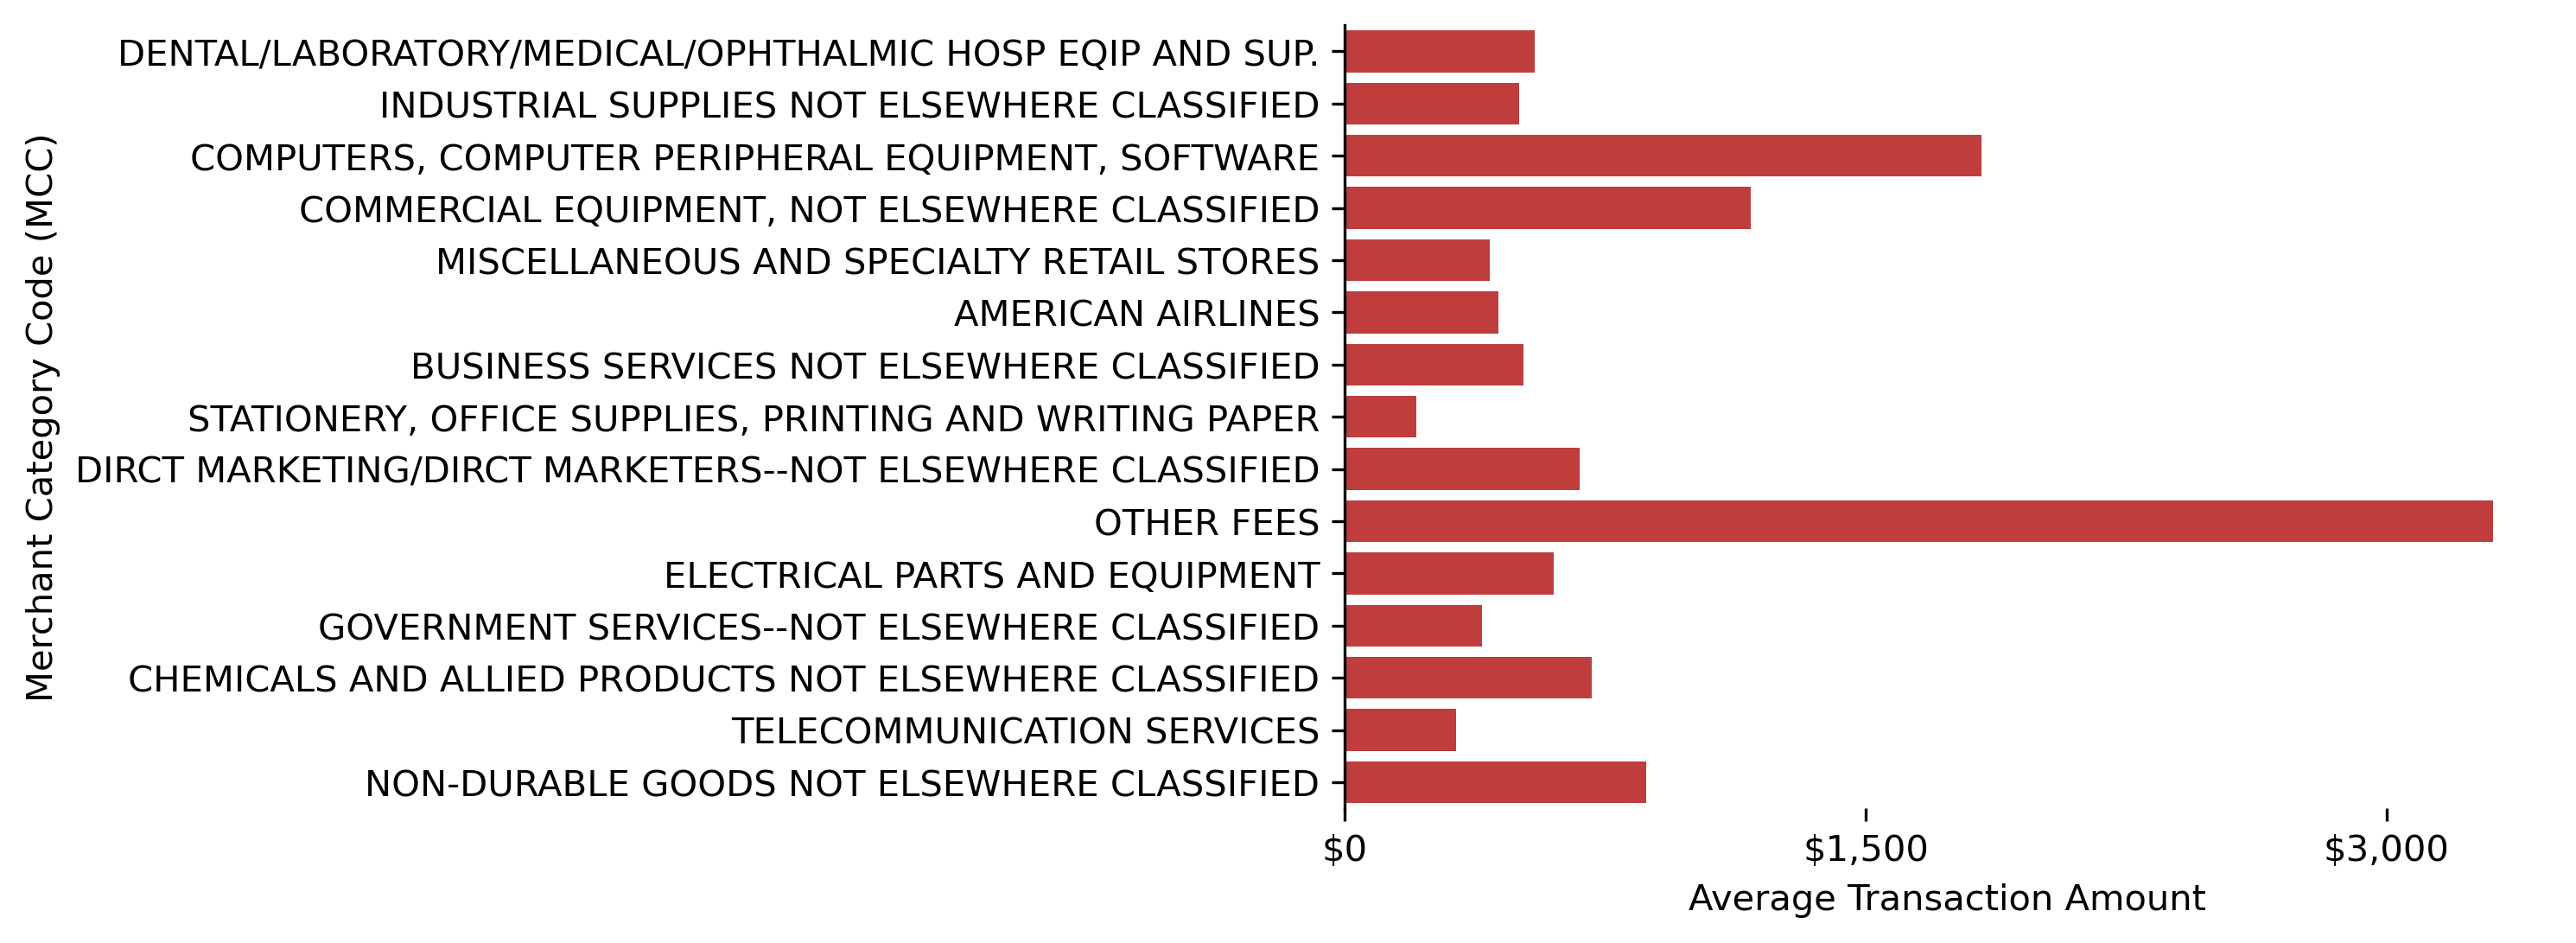

In [24]:
fig, ax = plt.subplots(1,1)
barplot = sns.barplot(data=top_15_what, x="mean", y="Merchant Category Code (MCC)",ci=None,color='tab:red')
barplot.xaxis.set_major_formatter('${x:,.0f}')
plt.xlabel('Average Transaction Amount')
sns.despine(left=False, bottom=True)
ax.set_xticks(ax.get_xticks()[::3])
plt.show()

In [25]:
agencies_summed = (df.groupby('Agency Name')['Amount']
 .agg(['sum']))

In [26]:
# How many agencies spent less than what would be saved with a theoretical renegotiation?
print('Count of agencies that spent less than what would be saved:',np.count_nonzero(agencies_summed < 2832290.87))

# How many agencies spent less than 1/4 of what would be saved?
print('Count of agencies that spent less than 1/4 of savings:',np.count_nonzero(agencies_summed < 2832290.87/2))

#How many agencies spent less than 1/16 of what would be saved?
print('Count of agencies that spent less than 1/16 of savings:',np.count_nonzero(agencies_summed < 2832290.87/16))

#How many agencies spent less than 1/32 of what would be saved?
print('Count of agencies that spent less than 1/16 of savings:',np.count_nonzero(agencies_summed < 2832290.87/32))

Count of agencies that spent less than what would be saved: 114
Count of agencies that spent less than 1/4 of savings: 106
Count of agencies that spent less than 1/16 of savings: 72
Count of agencies that spent less than 1/16 of savings: 56


In [27]:
TotalAmount = df['Amount'].sum()
'${:,.2f}'.format(TotalAmount)

'$188,040,743.13'

In [28]:
totalVisa = df['Visa Fee'].sum()

totalReno = df['Renegotiated Fee'].sum()

'${:,.2f}'.format(totalVisa)

'$6,581,561.87'

In [29]:
'${:,.2f}'.format(totalReno)

'$3,749,271.00'

In [30]:
'${:,.2f}'.format(totalVisa - totalReno)

'$2,832,290.87'

<Figure size 3000x1800 with 0 Axes>

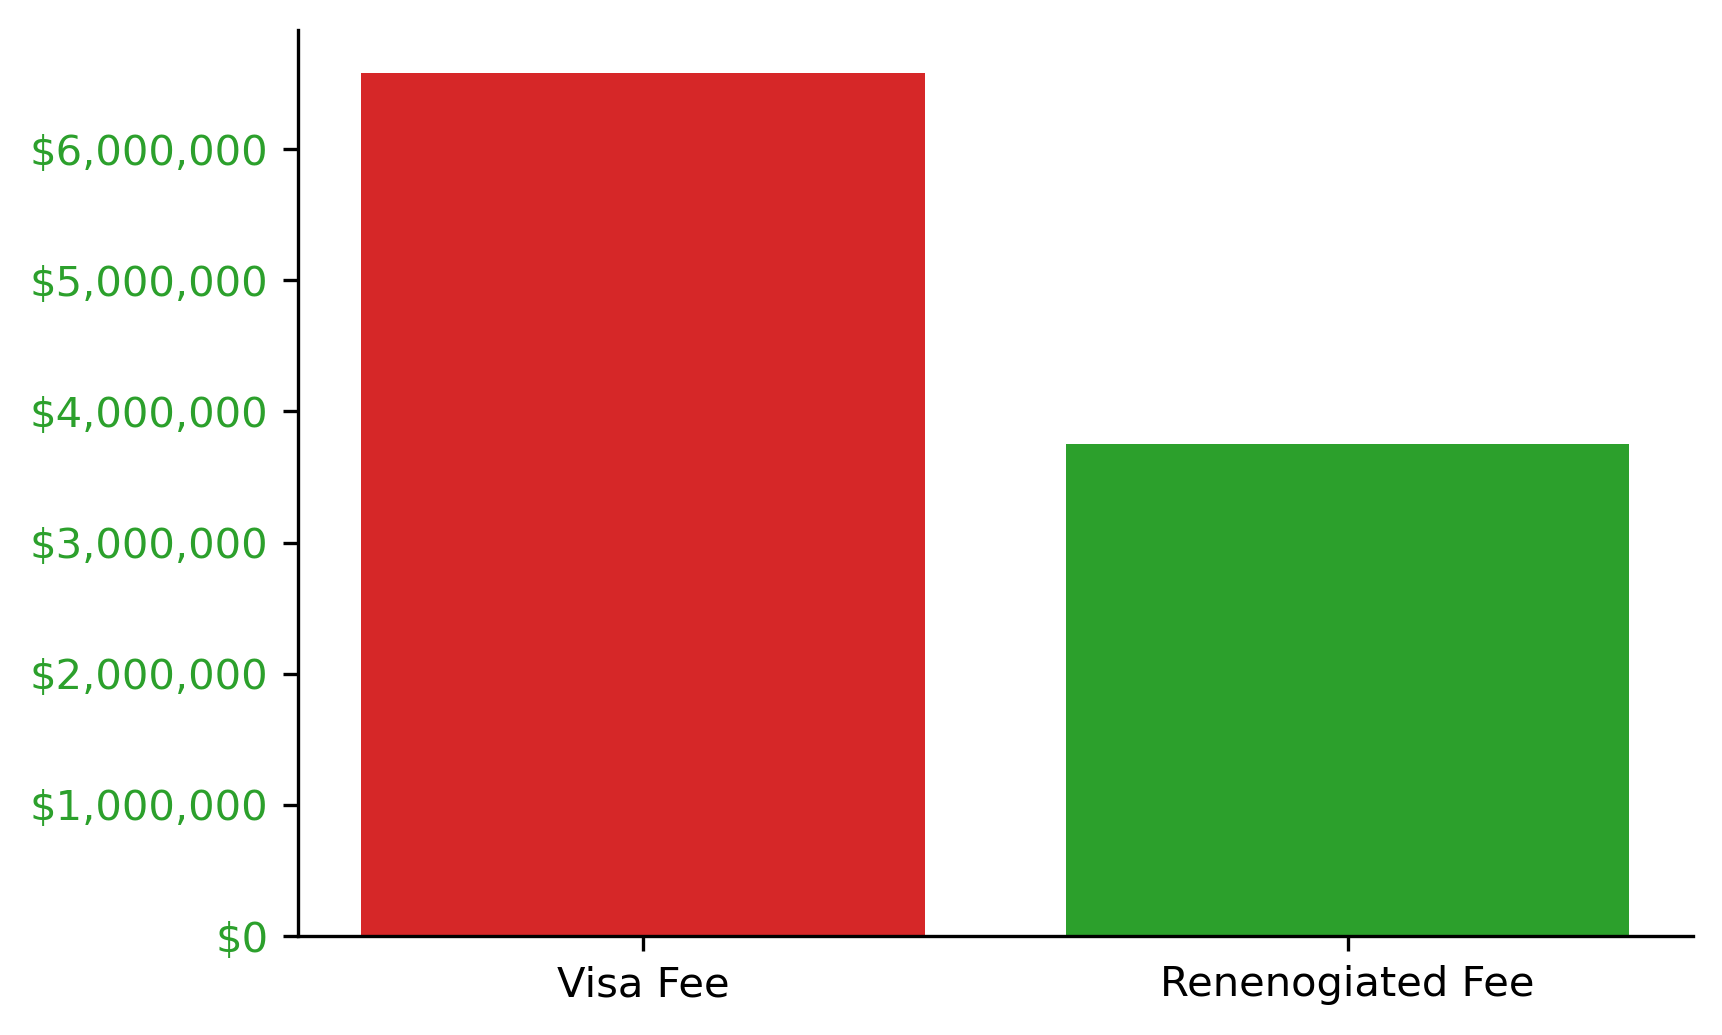

In [31]:

plt.figure(figsize=(10,6))

fig, ax = plt.subplots()

x = ['Visa Fee','Renenogiated Fee']

y = [totalVisa, df['Renegotiated Fee'].sum()]

ax.yaxis.set_major_formatter('${x:,.0f}')

ax.yaxis.set_tick_params(which='major', labelcolor='tab:green',
                         labelleft=True, labelright=False)
sns.despine(left=False,right=True)
plt.bar(x,y,color=('tab:red','tab:green'))

plt.show()